# Prepare a Python notebook to build, train and evaluate a regression model on the given dataset. 
Business Case: Build regression models to predict car price based on various features given:


# 1.IMPORT LIBRARIES/DATASET

# •	Import the required libraries and the dataset 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Importing the dataset
data = pd.read_csv(r'C:\Users\2211630\OneDrive - Cognizant\Desktop\CarPrice.csv')
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
data.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
data.describe(include ="all")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corolla,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


# 2.DATA VISUALISATION AND AUGMENTATION

# •	Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

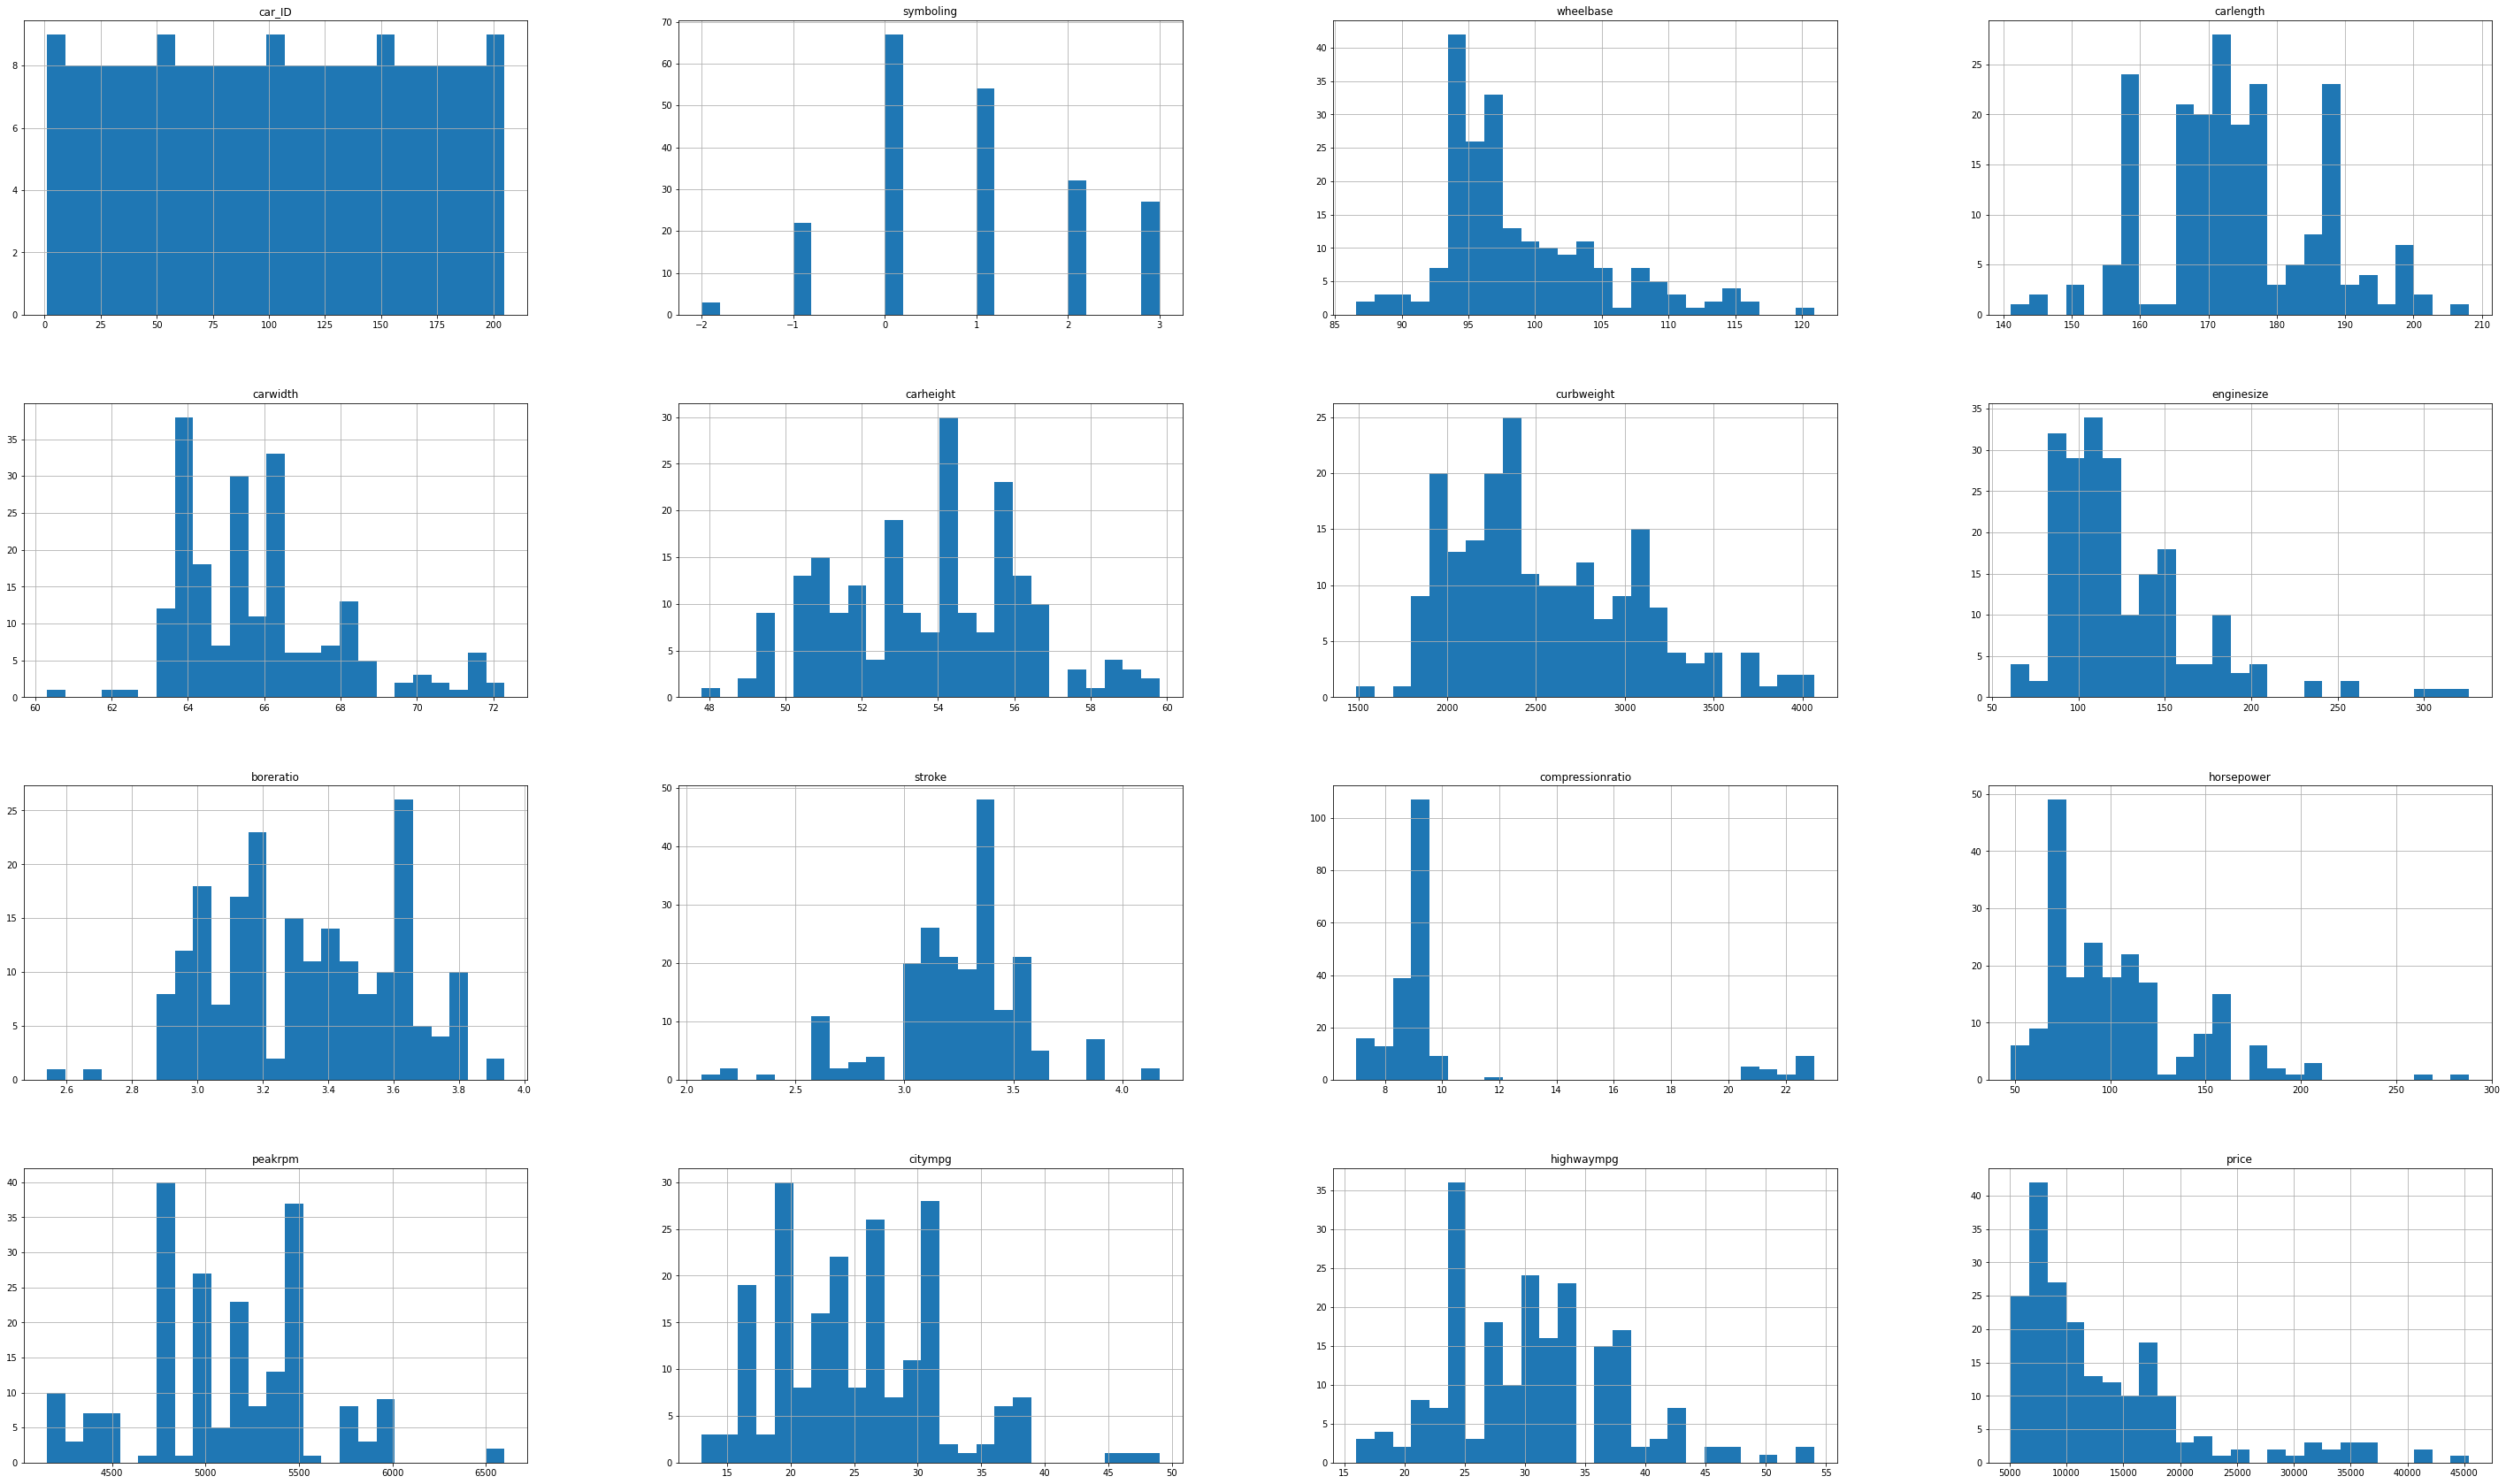

In [11]:
data.hist(bins=25,figsize=(50,30));

C:\Users\2211630\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

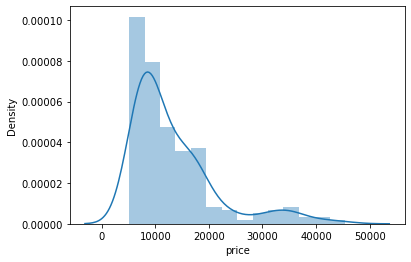

In [17]:
#distribution of price
sns.distplot(data['price'],kde=True)

<AxesSubplot:xlabel='carbody', ylabel='enginesize'>

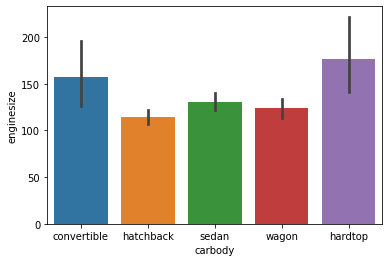

In [12]:
sns.barplot(y='enginesize',x='carbody',data=data)

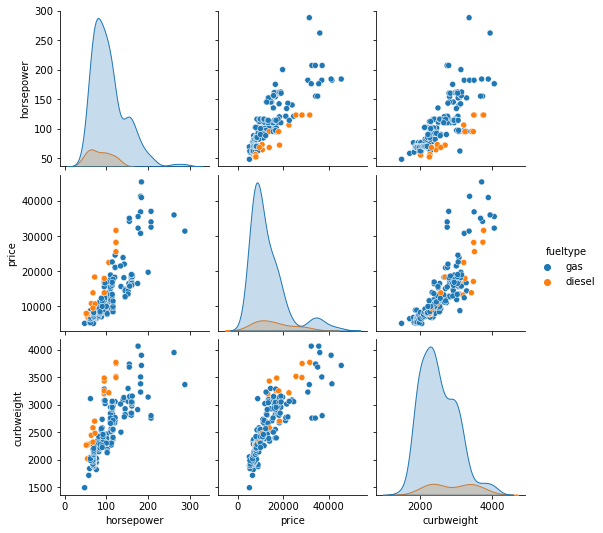

In [13]:
sns.pairplot(data[['horsepower','price','curbweight','fueltype']], hue="fueltype");

<AxesSubplot:>

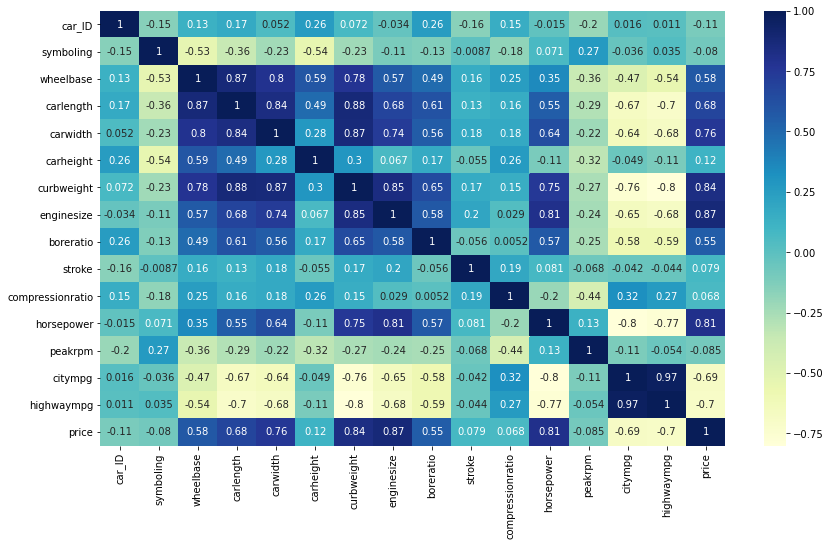

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# •	Prepare data to be able to build the model 

In [15]:
#dropping unwanted data
data.drop(["car_ID"], inplace = True , axis =1)

In [16]:
data.drop(["CarName"], inplace = True , axis =1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [18]:
#checking for nul values
print(data.isnull().values.any())

False


In [19]:
x = data.drop(['price'] , axis = 1).values
y= data['price' ].values

In [20]:
#encoding categorical variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3,4,5,6,12,13,15])],remainder='passthrough')
x=ct.fit_transform(x)

# •	Bring the train and test data in the required format

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=0)

# •	Perform missing values check 

In [22]:
data.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# •	Perform scaling of data

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# •	Print the shapes of train and test data

In [49]:
x_train.shape

(153, 52)

In [50]:
x_test.shape

(52, 52)

In [51]:
y_train.shape

(153,)

In [52]:
y_test.shape

(52,)

# 3.DECISION TREE REGRESSION MODEL BUILDING

# •	Build a decision tree regression model

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

# •	Train the model on the train dataset 

In [54]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred = dt_reg.predict(x_test)

# •	Print the final train and validation RMSE and MSE 

# •	Check for other evaluation metrics like MAE, R2, etc. and explain which one should be used to evaluate this model 

In [56]:
from sklearn.metrics import r2_score
print("The value of R-Square is ",r2_score(y_test,y_pred))

The value of R-Square is  0.8799038549391198


In [57]:
from sklearn.metrics import mean_absolute_error
print("The value of mean_absolute_error is ",mean_absolute_error(y_test,y_pred))

The value of mean_absolute_error is  2015.201923076923


In [58]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("The value of mean_squared_error is ",mse)

The value of mean_squared_error is  8955332.514423076


In [59]:
root_mean_squared_error = mse ** 0.5
print("The value of root_mean_squared_error is ",root_mean_squared_error)

The value of root_mean_squared_error is  2992.5461591131852


In [60]:
from sklearn.metrics import mean_squared_log_error
print("The value of root_mean_squared_error is ",mean_squared_log_error(y_test,y_pred))

The value of root_mean_squared_error is  0.03919778158581052


# 4.RANDOM FOREST REGRESSION MODEL BUILDING

# •	Build a random forest regression Model

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

# •	Train the model on the train dataset 

In [62]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred = rf_reg.predict(x_test)

# MODEL EVALUATION

# •	Print the final train and validation RMSE and MSE 

# •	Check for other evaluation metrics like MAE, R2, etc. and explain which one should be used to evaluate this model 

In [64]:
from sklearn.metrics import r2_score
print("The value of R-Square is ",r2_score(y_test,y_pred))

The value of R-Square is  0.9084904021205817


In [65]:
from sklearn.metrics import mean_absolute_error
print("The value of mean_absolute_error is ",mean_absolute_error(y_test,y_pred))

The value of mean_absolute_error is  1834.299951089744


In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("The value of mean_squared_error is ",mse)

The value of mean_squared_error is  6823690.109752546


In [67]:
root_mean_squared_error = mse ** 0.5
print("The value of root_mean_squared_error is ",root_mean_squared_error)

The value of root_mean_squared_error is  2612.219383924816


In [68]:
from sklearn.metrics import mean_squared_log_error
print("The value of root_mean_squared_error is ",mean_squared_log_error(y_test,y_pred))

The value of root_mean_squared_error is  0.027633716472866703


R Squared is better used to explain and evaluate this model so that we can explain the number as a percentage of the output variability. Mean squared error,root mean squared error, or mean absolute error are better be used to compare performance between different regression models. 

Personally,I would prefer using R squared and RMSE to evaluate the model. However, we can also use mean squared error if the value is not too big and mean absolute error if we do not want to penalize large prediction errors.

# Compare the performance of decision tree regression and random forest regression models for given dataset 


The findings from above models are as follow:

    1.Random Forest Model has the highest R-squared value
    
    2.Mean Absolute Error is least in Random Forest Model
    
    3.Mean squared error is least in Random Forest Model
    
    4.Root mean squared error is least in Random Forest Model
    
    5.Mean Squared log error is least in Random Forest Model

From all these observations, we can conclude that RANDOM FOREST MODEL is best fit and performs well for the given dataset as it has the highest R-square value and the lowest error.
        